<a href="https://colab.research.google.com/github/Rido843/Basic-Python-Programming-for-Data-Science/blob/main/Hidden_Markov_Model_ANTM_(_8_State_)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('ANTM.xlsx')
df

,NO,Date,Close,Selisih
0,1,2020-12-30,1935,NaN
1,2,2021-01-04,2190,255.0
2,3,2021-01-05,2230,40.0
3,4,2021-01-06,2220,-10.0
4,5,2021-01-07,2600,380.0
...,...,...,...,...
245,246,2021-12-28,2260,-40.0
246,247,2021-12-29,2270,10.0
247,248,2021-12-30,2250,-20.0
248,249,2022-01-03,2340,90.0


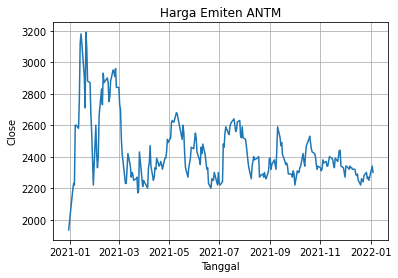

In [ ]:
y = df['Close']
x = df['Date']
plt.plot(x, y)

plt.xlabel('Tanggal')
plt.ylabel('Close')

plt.title('Harga Emiten ANTM')
plt.grid(True)

plt.show()

In [ ]:
 df1 = df.drop(columns=['NO','Date','Close']).dropna()
df1

,Selisih
1,255.0
2,40.0
3,-10.0
4,380.0
5,0.0
...,...
245,-40.0
246,10.0
247,-20.0
248,90.0


In [ ]:
data = np.array(df1['Selisih'])
data

array([ 255.,   40.,  -10.,  380.,    0.,  -20.,  190.,  350.,   60.,
        -60., -210., -200.,  480., -100., -210.,  -10., -200., -120.,
       -170., -160.,  380., -180.,  -90.,   70.,  260.,  170., -100.,
        200.,  -60.,   30.,  -30., -120.,   30.,  100.,   70.,  -10.,
        -30.,   50., -120.,    0., -110.,  -30., -180., -100., -140.,
        -50.,    0.,  190.,  -80.,  -70.,   30.,  -10.,  -40.,   10.,
         10., -100.,   10.,  250., -170.,  -50.,   40.,  -10.,  -40.,
        130.,   30.,  110., -130.,  -90.,   20.,   60.,  -10.,   70.,
        -50.,   10.,   20.,  -20.,  -30.,   70.,    0.,   40.,   80.,
        -20.,   30.,  100.,   10.,  -10.,    0.,   60.,  -10., -160.,
         90.,  -50., -130.,  -90.,  -60.,   60.,   60.,   70.,  -10.,
        100.,  -30.,  -90.,  -50.,  -30.,  110.,  -40.,   60.,  -70.,
        -50.,  -40.,   10., -100.,  -30.,   60.,  -10.,    0.,   50.,
        -60.,  -20.,   80.,  -70.,  -10.,   20.,  240.,  -20.,   90.,
         40.,  -40.,

In [ ]:
data.shape

(249,)

In [ ]:
# Nilai maksimum
maks = np.max(data)
# Nilai minimum
min = np.min(data)

# Selisih 
sls = maks - min

print('Nilai Maks : ',maks)
print('Nilai Min : ',min)
print('Selisih : ',sls)

Nilai Maks :  480.0
Nilai Min :  -210.0
Selisih :  690.0


In [ ]:
#Banyak State
s = 8
State = []
for i in range(s):
  nam ='S'+str(i+1)
  State.append(nam)
State

['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8']

In [ ]:
# Pembentukan Interval
L = sls/s 
bb = list(np.arange(min,maks,L))
ba = list(np.arange(bb[1],maks,L))
ba.append(maks)
BB = np.array(bb)
BA = np.array(ba)
print(BB)
print(BA)

[-210.   -123.75  -37.5    48.75  135.    221.25  307.5   393.75]
[-123.75  -37.5    48.75  135.    221.25  307.5   393.75  480.  ]


In [ ]:
#Pembagian s state dan Peluang State
df_stat = pd.DataFrame(list(zip(State,BB,BA)), columns=['state','BB','BA'])
df_stat

,state,BB,BA
0,S1,-210.00,-123.75
1,S2,-123.75,-37.50
2,S3,-37.50,48.75
3,S4,48.75,135.00
4,S5,135.00,221.25
5,S6,221.25,307.50
6,S7,307.50,393.75
7,S8,393.75,480.00


In [ ]:
#Menentukan banyak data yang masuk pada state tertentu
state_1=[]
state_2=[]
state_3=[]
state_4=[]
state_5=[]
state_6=[]
state_7=[]
state_8=[]

for i in range(len(data)):
  if BB[0] <= data[i] < BA[0]:
    state_1.append(data[i])
  elif BB[1] < data[i] < BA[1]:
    state_2.append(data[i])
  elif BB[2] < data[i] < BA[2]:
    state_3.append(data[i]) 
  elif BB[3] < data[i] <= BA[3]:
    state_4.append(data[i])
  elif BB[4] < data[i] <= BA[4]:
    state_5.append(data[i])
  elif BB[5] < data[i] <= BA[5]:
    state_6.append(data[i])
  elif BB[6] < data[i] <= BA[6]:
    state_7.append(data[i])
  elif BB[7] < data[i] <= BA[7]:
    state_8.append(data[i])


jmlh_state = []
jmlh_state.append(len(state_1))
jmlh_state.append(len(state_2))
jmlh_state.append(len(state_3))
jmlh_state.append(len(state_4))
jmlh_state.append(len(state_5))
jmlh_state.append(len(state_6))
jmlh_state.append(len(state_7))
jmlh_state.append(len(state_8))


df_stat['Banyak_Data'] = jmlh_state
df_stat

,state,BB,BA,Banyak_Data
0,S1,-210.00,-123.75,14
1,S2,-123.75,-37.50,54
2,S3,-37.50,48.75,128
3,S4,48.75,135.00,40
4,S5,135.00,221.25,5
5,S6,221.25,307.50,4
6,S7,307.50,393.75,3
7,S8,393.75,480.00,1


In [ ]:
#Membentuk pi
PI = []
for k in range(s):
  nem ='pi'+str(k+1)
  PI.append(nem)
PI
df_stat['Peluang'] = PI

In [ ]:
# Menentukan nilai peluang pi 
pi = []
for i in range(s):
  piu = jmlh_state[i]/len(data)
  pi.append(piu)

pi = np.array(pi)
df_stat['Nilai'] = pi

In [ ]:
df_stat

,state,BB,BA,Banyak_Data,Peluang,Nilai
0,S1,-210.00,-123.75,14,pi1,0.056225
1,S2,-123.75,-37.50,54,pi2,0.216867
2,S3,-37.50,48.75,128,pi3,0.514056
3,S4,48.75,135.00,40,pi4,0.160643
4,S5,135.00,221.25,5,pi5,0.020080
5,S6,221.25,307.50,4,pi6,0.016064
6,S7,307.50,393.75,3,pi7,0.012048
7,S8,393.75,480.00,1,pi8,0.004016


In [ ]:
#Menentukan data masuk ke dalam state
Fd = ['NaN']
for i in range(len(data)):
  if BB[0] <= data[i] < BA[0]:
    fd = State[0]
    Fd.append(fd)
  elif BB[1] < data[i] < BA[1]:
    fd = State[1]
    Fd.append(fd)
  elif BB[2] < data[i] < BA[2]:
    fd = State[2]
    Fd.append(fd) 
  elif BB[3] < data[i] <= BA[3]:
    fd = State[3]
    Fd.append(fd)
  elif BB[4] < data[i] <= BA[4]:
    fd = State[4]
    Fd.append(fd)
  elif BB[5] < data[i] <= BA[5]:
    fd = State[5]
    Fd.append(fd)
  elif BB[6] < data[i] <= BA[6]:
    fd = State[6]
    Fd.append(fd)
  elif BB[7] < data[i] <= BA[7]:
    fd = State[7]
    Fd.append(fd)

Fd
df['St'] = Fd
df

,NO,Date,Close,Selisih,St
0,1,2020-12-30,1935,NaN,NaN
1,2,2021-01-04,2190,255.0,S6
2,3,2021-01-05,2230,40.0,S3
3,4,2021-01-06,2220,-10.0,S3
4,5,2021-01-07,2600,380.0,S7
...,...,...,...,...,...
245,246,2021-12-28,2260,-40.0,S2
246,247,2021-12-29,2270,10.0,S3
247,248,2021-12-30,2250,-20.0,S3
248,249,2022-01-03,2340,90.0,S4


In [ ]:
#state kiri
st_l = np.array(df['St'].shift(1))

#state kanan
dk = np.array(st_l)
dk_1 = np.delete(dk,2)
st_r = dk_1

#perpindahan state
ps = ['NaN-NaN','NaN-NaN']
i = 1
while i<(len(dk_1)):
  ps_1 = st_l[i]+'-'+st_r[i]
  ps.append(ps_1)
  i=i+1
ps = np.array(ps)
df['PS'] = ps
df['PS'] = df['PS'].shift(-1)
df

,NO,Date,Close,Selisih,St,PS
0,1,2020-12-30,1935,NaN,NaN,NaN-NaN
1,2,2021-01-04,2190,255.0,S6,NaN-NaN
2,3,2021-01-05,2230,40.0,S3,S6-S3
3,4,2021-01-06,2220,-10.0,S3,S3-S3
4,5,2021-01-07,2600,380.0,S7,S3-S7
...,...,...,...,...,...,...
245,246,2021-12-28,2260,-40.0,S2,S3-S2
246,247,2021-12-29,2270,10.0,S3,S2-S3
247,248,2021-12-30,2250,-20.0,S3,S3-S3
248,249,2022-01-03,2340,90.0,S4,S3-S4


#***Pembentukan Matriks Transisi***

In [ ]:
A=[]

In [ ]:
S1_ke_S1 = df[df.PS == 'S1-S1']
S1_ke_S2 = df[df.PS == 'S1-S2']
S1_ke_S3 = df[df.PS == 'S1-S3']
S1_ke_S4 = df[df.PS == 'S1-S4']
S1_ke_S5 = df[df.PS == 'S1-S5']
S1_ke_S6 = df[df.PS == 'S1-S6']
S1_ke_S7 = df[df.PS == 'S1-S7']
S1_ke_S8 = df[df.PS == 'S1-S8']


In [ ]:
S2_ke_S1 = df[df.PS == 'S2-S1']
S2_ke_S2 = df[df.PS == 'S2-S2']
S2_ke_S3 = df[df.PS == 'S2-S3']
S2_ke_S4 = df[df.PS == 'S2-S4']
S2_ke_S5 = df[df.PS == 'S2-S5']
S2_ke_S6 = df[df.PS == 'S2-S6']
S2_ke_S7 = df[df.PS == 'S2-S7']
S2_ke_S8 = df[df.PS == 'S2-S8']


In [ ]:
S3_ke_S1 = df[df.PS == 'S3-S1']
S3_ke_S2 = df[df.PS == 'S3-S2']
S3_ke_S3 = df[df.PS == 'S3-S3']
S3_ke_S4 = df[df.PS == 'S3-S4']
S3_ke_S5 = df[df.PS == 'S3-S5']
S3_ke_S6 = df[df.PS == 'S3-S6']
S3_ke_S7 = df[df.PS == 'S3-S7']
S3_ke_S8 = df[df.PS == 'S3-S8']


In [ ]:
S4_ke_S1 = df[df.PS == 'S4-S1']
S4_ke_S2 = df[df.PS == 'S4-S2']
S4_ke_S3 = df[df.PS == 'S4-S3']
S4_ke_S4 = df[df.PS == 'S4-S4']
S4_ke_S5 = df[df.PS == 'S4-S5']
S4_ke_S6 = df[df.PS == 'S4-S6']
S4_ke_S7 = df[df.PS == 'S4-S7']
S4_ke_S8 = df[df.PS == 'S4-S8']


In [ ]:
S5_ke_S1 = df[df.PS == 'S5-S1']
S5_ke_S2 = df[df.PS == 'S5-S2']
S5_ke_S3 = df[df.PS == 'S5-S3']
S5_ke_S4 = df[df.PS == 'S5-S4']
S5_ke_S5 = df[df.PS == 'S5-S5']
S5_ke_S6 = df[df.PS == 'S5-S6']
S5_ke_S7 = df[df.PS == 'S5-S7']
S5_ke_S8 = df[df.PS == 'S5-S8']


In [ ]:
S6_ke_S1 = df[df.PS == 'S6-S1']
S6_ke_S2 = df[df.PS == 'S6-S2']
S6_ke_S3 = df[df.PS == 'S6-S3']
S6_ke_S4 = df[df.PS == 'S6-S4']
S6_ke_S5 = df[df.PS == 'S6-S5']
S6_ke_S6 = df[df.PS == 'S6-S6']
S6_ke_S7 = df[df.PS == 'S6-S7']
S6_ke_S8 = df[df.PS == 'S6-S8']


In [ ]:
S7_ke_S1 = df[df.PS == 'S7-S1']
S7_ke_S2 = df[df.PS == 'S7-S2']
S7_ke_S3 = df[df.PS == 'S7-S3']
S7_ke_S4 = df[df.PS == 'S7-S4']
S7_ke_S5 = df[df.PS == 'S7-S5']
S7_ke_S6 = df[df.PS == 'S7-S6']
S7_ke_S7 = df[df.PS == 'S7-S7']
S7_ke_S8 = df[df.PS == 'S7-S8']


In [ ]:
S8_ke_S1 = df[df.PS == 'S8-S1']
S8_ke_S2 = df[df.PS == 'S8-S2']
S8_ke_S3 = df[df.PS == 'S8-S3']
S8_ke_S4 = df[df.PS == 'S8-S4']
S8_ke_S5 = df[df.PS == 'S8-S5']
S8_ke_S6 = df[df.PS == 'S8-S6']
S8_ke_S7 = df[df.PS == 'S8-S7']
S8_ke_S8 = df[df.PS == 'S8-S8']


In [ ]:
jumlah_state = []

state_1 = len(S1_ke_S1)+len(S1_ke_S2)+len(S1_ke_S3)+len(S1_ke_S4)+len(S1_ke_S5)+len(S1_ke_S6)+len(S1_ke_S7)+len(S1_ke_S8)
jumlah_state.append(state_1)
state_2 = len(S2_ke_S1)+len(S2_ke_S2)+len(S2_ke_S3)+len(S2_ke_S4)+len(S2_ke_S5)+len(S2_ke_S6)+len(S2_ke_S7)+len(S2_ke_S8)
jumlah_state.append(state_2)
state_3 = len(S3_ke_S1)+len(S3_ke_S2)+len(S3_ke_S3)+len(S3_ke_S4)+len(S3_ke_S5)+len(S3_ke_S6)+len(S3_ke_S7)+len(S3_ke_S8)
jumlah_state.append(state_3)
state_4 = len(S4_ke_S1)+len(S4_ke_S2)+len(S4_ke_S3)+len(S4_ke_S4)+len(S4_ke_S5)+len(S4_ke_S6)+len(S4_ke_S7)+len(S4_ke_S8)
jumlah_state.append(state_4)
state_5 = len(S5_ke_S1)+len(S5_ke_S2)+len(S5_ke_S3)+len(S5_ke_S4)+len(S5_ke_S5)+len(S5_ke_S6)+len(S5_ke_S7)+len(S5_ke_S8)
jumlah_state.append(state_5)
state_6 = len(S6_ke_S1)+len(S6_ke_S2)+len(S6_ke_S3)+len(S6_ke_S4)+len(S6_ke_S5)+len(S6_ke_S6)+len(S6_ke_S7)+len(S6_ke_S8)
jumlah_state.append(state_6)
state_7 = len(S7_ke_S1)+len(S7_ke_S2)+len(S7_ke_S3)+len(S7_ke_S4)+len(S7_ke_S5)+len(S7_ke_S6)+len(S7_ke_S7)+len(S7_ke_S8)
jumlah_state.append(state_7)
state_8 = len(S8_ke_S1)+len(S8_ke_S2)+len(S8_ke_S3)+len(S8_ke_S4)+len(S8_ke_S5)+len(S8_ke_S6)+len(S8_ke_S7)+len(S8_ke_S8)
jumlah_state.append(state_8)


jumlah_state

[14, 53, 128, 39, 5, 4, 3, 1]

In [ ]:
A_11 = len(S1_ke_S1)/(len(S1_ke_S1)+len(S1_ke_S2)+len(S1_ke_S3)+len(S1_ke_S4)+len(S1_ke_S5)+len(S1_ke_S6)+len(S1_ke_S7)+len(S1_ke_S8))
A.append(A_11)
A_12 = len(S1_ke_S2)/(len(S1_ke_S1)+len(S1_ke_S2)+len(S1_ke_S3)+len(S1_ke_S4)+len(S1_ke_S5)+len(S1_ke_S6)+len(S1_ke_S7)+len(S1_ke_S8))
A.append(A_12)
A_13 = len(S1_ke_S3)/(len(S1_ke_S1)+len(S1_ke_S2)+len(S1_ke_S3)+len(S1_ke_S4)+len(S1_ke_S5)+len(S1_ke_S6)+len(S1_ke_S7)+len(S1_ke_S8))
A.append(A_13)
A_14 = len(S1_ke_S4)/(len(S1_ke_S1)+len(S1_ke_S2)+len(S1_ke_S3)+len(S1_ke_S4)+len(S1_ke_S5)+len(S1_ke_S6)+len(S1_ke_S7)+len(S1_ke_S8))
A.append(A_14)
A_15 = len(S1_ke_S5)/(len(S1_ke_S1)+len(S1_ke_S2)+len(S1_ke_S3)+len(S1_ke_S4)+len(S1_ke_S5)+len(S1_ke_S6)+len(S1_ke_S7)+len(S1_ke_S8))
A.append(A_15)
A_16 = len(S1_ke_S6)/(len(S1_ke_S1)+len(S1_ke_S2)+len(S1_ke_S3)+len(S1_ke_S4)+len(S1_ke_S5)+len(S1_ke_S6)+len(S1_ke_S7)+len(S1_ke_S8))
A.append(A_16)
A_17 = len(S1_ke_S7)/(len(S1_ke_S1)+len(S1_ke_S2)+len(S1_ke_S3)+len(S1_ke_S4)+len(S1_ke_S5)+len(S1_ke_S6)+len(S1_ke_S7)+len(S1_ke_S8))
A.append(A_17)
A_18 = len(S1_ke_S8)/(len(S1_ke_S1)+len(S1_ke_S2)+len(S1_ke_S3)+len(S1_ke_S4)+len(S1_ke_S5)+len(S1_ke_S6)+len(S1_ke_S7)+len(S1_ke_S8))
A.append(A_18)


In [ ]:
A_21 = len(S2_ke_S1)/(len(S2_ke_S1)+len(S2_ke_S2)+len(S2_ke_S3)+len(S2_ke_S4)+len(S2_ke_S5)+len(S2_ke_S6)+len(S2_ke_S7)+len(S2_ke_S8))
A.append(A_21)
A_22 = len(S2_ke_S2)/(len(S2_ke_S1)+len(S2_ke_S2)+len(S2_ke_S3)+len(S2_ke_S4)+len(S2_ke_S5)+len(S2_ke_S6)+len(S2_ke_S7)+len(S2_ke_S8))
A.append(A_22)
A_23 = len(S2_ke_S3)/(len(S2_ke_S1)+len(S2_ke_S2)+len(S2_ke_S3)+len(S2_ke_S4)+len(S2_ke_S5)+len(S2_ke_S6)+len(S2_ke_S7)+len(S2_ke_S8))
A.append(A_23)
A_24 = len(S2_ke_S4)/(len(S2_ke_S1)+len(S2_ke_S2)+len(S2_ke_S3)+len(S2_ke_S4)+len(S2_ke_S5)+len(S2_ke_S6)+len(S2_ke_S7)+len(S2_ke_S8))
A.append(A_24)
A_25 = len(S2_ke_S5)/(len(S2_ke_S1)+len(S2_ke_S2)+len(S2_ke_S3)+len(S2_ke_S4)+len(S2_ke_S5)+len(S2_ke_S6)+len(S2_ke_S7)+len(S2_ke_S8))
A.append(A_25)
A_26 = len(S2_ke_S6)/(len(S2_ke_S1)+len(S2_ke_S2)+len(S2_ke_S3)+len(S2_ke_S4)+len(S2_ke_S5)+len(S2_ke_S6)+len(S2_ke_S7)+len(S2_ke_S8))
A.append(A_26)
A_27 = len(S2_ke_S7)/(len(S2_ke_S1)+len(S2_ke_S2)+len(S2_ke_S3)+len(S2_ke_S4)+len(S2_ke_S5)+len(S2_ke_S6)+len(S2_ke_S7)+len(S2_ke_S8))
A.append(A_27)
A_28 = len(S2_ke_S8)/(len(S2_ke_S1)+len(S2_ke_S2)+len(S2_ke_S3)+len(S2_ke_S4)+len(S2_ke_S5)+len(S2_ke_S6)+len(S2_ke_S7)+len(S2_ke_S8))
A.append(A_28)

In [ ]:
A_31 = len(S3_ke_S1)/(len(S3_ke_S1)+len(S3_ke_S2)+len(S3_ke_S3)+len(S3_ke_S4)+len(S3_ke_S5)+len(S3_ke_S6)+len(S3_ke_S7)+len(S3_ke_S8))
A.append(A_31)
A_32 = len(S3_ke_S2)/(len(S3_ke_S1)+len(S3_ke_S2)+len(S3_ke_S3)+len(S3_ke_S4)+len(S3_ke_S5)+len(S3_ke_S6)+len(S3_ke_S7)+len(S3_ke_S8))
A.append(A_32)
A_33 = len(S3_ke_S3)/(len(S3_ke_S1)+len(S3_ke_S2)+len(S3_ke_S3)+len(S3_ke_S4)+len(S3_ke_S5)+len(S3_ke_S6)+len(S3_ke_S7)+len(S3_ke_S8))
A.append(A_33)
A_34 = len(S3_ke_S4)/(len(S3_ke_S1)+len(S3_ke_S2)+len(S3_ke_S3)+len(S3_ke_S4)+len(S3_ke_S5)+len(S3_ke_S6)+len(S3_ke_S7)+len(S3_ke_S8))
A.append(A_34)
A_35 = len(S3_ke_S5)/(len(S3_ke_S1)+len(S3_ke_S2)+len(S3_ke_S3)+len(S3_ke_S4)+len(S3_ke_S5)+len(S3_ke_S6)+len(S3_ke_S7)+len(S3_ke_S8))
A.append(A_35)
A_36 = len(S3_ke_S6)/(len(S3_ke_S1)+len(S3_ke_S2)+len(S3_ke_S3)+len(S3_ke_S4)+len(S3_ke_S5)+len(S3_ke_S6)+len(S3_ke_S7)+len(S3_ke_S8))
A.append(A_36)
A_37 = len(S3_ke_S7)/(len(S3_ke_S1)+len(S3_ke_S2)+len(S3_ke_S3)+len(S3_ke_S4)+len(S3_ke_S5)+len(S3_ke_S6)+len(S3_ke_S7)+len(S3_ke_S8))
A.append(A_37)
A_38 = len(S3_ke_S8)/(len(S3_ke_S1)+len(S3_ke_S2)+len(S3_ke_S3)+len(S3_ke_S4)+len(S3_ke_S5)+len(S3_ke_S6)+len(S3_ke_S7)+len(S3_ke_S8))
A.append(A_38)


In [ ]:
A_41 = len(S4_ke_S1)/(len(S4_ke_S1)+len(S4_ke_S2)+len(S4_ke_S3)+len(S4_ke_S4)+len(S4_ke_S5)+len(S4_ke_S6)+len(S4_ke_S7)+len(S4_ke_S8))
A.append(A_41)
A_42 = len(S4_ke_S2)/(len(S4_ke_S1)+len(S4_ke_S2)+len(S4_ke_S3)+len(S4_ke_S4)+len(S4_ke_S5)+len(S4_ke_S6)+len(S4_ke_S7)+len(S4_ke_S8))
A.append(A_42)
A_43 = len(S4_ke_S3)/(len(S4_ke_S1)+len(S4_ke_S2)+len(S4_ke_S3)+len(S4_ke_S4)+len(S4_ke_S5)+len(S4_ke_S6)+len(S4_ke_S7)+len(S4_ke_S8))
A.append(A_43)
A_44 = len(S4_ke_S4)/(len(S4_ke_S1)+len(S4_ke_S2)+len(S4_ke_S3)+len(S4_ke_S4)+len(S4_ke_S5)+len(S4_ke_S6)+len(S4_ke_S7)+len(S4_ke_S8))
A.append(A_44)
A_45 = len(S4_ke_S5)/(len(S4_ke_S1)+len(S4_ke_S2)+len(S4_ke_S3)+len(S4_ke_S4)+len(S4_ke_S5)+len(S4_ke_S6)+len(S4_ke_S7)+len(S4_ke_S8))
A.append(A_45)
A_46 = len(S4_ke_S6)/(len(S4_ke_S1)+len(S4_ke_S2)+len(S4_ke_S3)+len(S4_ke_S4)+len(S4_ke_S5)+len(S4_ke_S6)+len(S4_ke_S7)+len(S4_ke_S8))
A.append(A_46)
A_47 = len(S4_ke_S7)/(len(S4_ke_S1)+len(S4_ke_S2)+len(S4_ke_S3)+len(S4_ke_S4)+len(S4_ke_S5)+len(S4_ke_S6)+len(S4_ke_S7)+len(S4_ke_S8))
A.append(A_47)
A_48 = len(S4_ke_S8)/(len(S4_ke_S1)+len(S4_ke_S2)+len(S4_ke_S3)+len(S4_ke_S4)+len(S4_ke_S5)+len(S4_ke_S6)+len(S4_ke_S7)+len(S4_ke_S8))
A.append(A_48)


In [ ]:
A_51 = len(S5_ke_S1)/(len(S5_ke_S1)+len(S5_ke_S2)+len(S5_ke_S3)+len(S5_ke_S4)+len(S5_ke_S5)+len(S5_ke_S6)+len(S5_ke_S7)+len(S5_ke_S8))
A.append(A_51)
A_52 = len(S5_ke_S2)/(len(S5_ke_S1)+len(S5_ke_S2)+len(S5_ke_S3)+len(S5_ke_S4)+len(S5_ke_S5)+len(S5_ke_S6)+len(S5_ke_S7)+len(S5_ke_S8))
A.append(A_52)
A_53 = len(S5_ke_S3)/(len(S5_ke_S1)+len(S5_ke_S2)+len(S5_ke_S3)+len(S5_ke_S4)+len(S5_ke_S5)+len(S5_ke_S6)+len(S5_ke_S7)+len(S5_ke_S8))
A.append(A_53)
A_54 = len(S5_ke_S4)/(len(S5_ke_S1)+len(S5_ke_S2)+len(S5_ke_S3)+len(S5_ke_S4)+len(S5_ke_S5)+len(S5_ke_S6)+len(S5_ke_S7)+len(S5_ke_S8))
A.append(A_54)
A_55 = len(S5_ke_S5)/(len(S5_ke_S1)+len(S5_ke_S2)+len(S5_ke_S3)+len(S5_ke_S4)+len(S5_ke_S5)+len(S5_ke_S6)+len(S5_ke_S7)+len(S5_ke_S8))
A.append(A_55)
A_56 = len(S5_ke_S6)/(len(S5_ke_S1)+len(S5_ke_S2)+len(S5_ke_S3)+len(S5_ke_S4)+len(S5_ke_S5)+len(S5_ke_S6)+len(S5_ke_S7)+len(S5_ke_S8))
A.append(A_56)
A_57 = len(S5_ke_S7)/(len(S5_ke_S1)+len(S5_ke_S2)+len(S5_ke_S3)+len(S5_ke_S4)+len(S5_ke_S5)+len(S5_ke_S6)+len(S5_ke_S7)+len(S5_ke_S8))
A.append(A_57)
A_58 = len(S5_ke_S8)/(len(S5_ke_S1)+len(S5_ke_S2)+len(S5_ke_S3)+len(S5_ke_S4)+len(S5_ke_S5)+len(S5_ke_S6)+len(S5_ke_S7)+len(S5_ke_S8))
A.append(A_58)


In [ ]:
A_61 = len(S6_ke_S1)/(len(S6_ke_S1)+len(S6_ke_S2)+len(S6_ke_S3)+len(S6_ke_S4)+len(S6_ke_S5)+len(S6_ke_S6)+len(S6_ke_S7)+len(S6_ke_S8))
A.append(A_61)
A_62 = len(S6_ke_S2)/(len(S6_ke_S1)+len(S6_ke_S2)+len(S6_ke_S3)+len(S6_ke_S4)+len(S6_ke_S5)+len(S6_ke_S6)+len(S6_ke_S7)+len(S6_ke_S8))
A.append(A_62)
A_63 = len(S6_ke_S3)/(len(S6_ke_S1)+len(S6_ke_S2)+len(S6_ke_S3)+len(S6_ke_S4)+len(S6_ke_S5)+len(S6_ke_S6)+len(S6_ke_S7)+len(S6_ke_S8))
A.append(A_63)
A_64 = len(S6_ke_S4)/(len(S6_ke_S1)+len(S6_ke_S2)+len(S6_ke_S3)+len(S6_ke_S4)+len(S6_ke_S5)+len(S6_ke_S6)+len(S6_ke_S7)+len(S6_ke_S8))
A.append(A_64)
A_65 = len(S6_ke_S5)/(len(S6_ke_S1)+len(S6_ke_S2)+len(S6_ke_S3)+len(S6_ke_S4)+len(S6_ke_S5)+len(S6_ke_S6)+len(S6_ke_S7)+len(S6_ke_S8))
A.append(A_65)
A_66 = len(S6_ke_S6)/(len(S6_ke_S1)+len(S6_ke_S2)+len(S6_ke_S3)+len(S6_ke_S4)+len(S6_ke_S5)+len(S6_ke_S6)+len(S6_ke_S7)+len(S6_ke_S8))
A.append(A_66)
A_67 = len(S6_ke_S7)/(len(S6_ke_S1)+len(S6_ke_S2)+len(S6_ke_S3)+len(S6_ke_S4)+len(S6_ke_S5)+len(S6_ke_S6)+len(S6_ke_S7)+len(S6_ke_S8))
A.append(A_67)
A_68 = len(S6_ke_S8)/(len(S6_ke_S1)+len(S6_ke_S2)+len(S6_ke_S3)+len(S6_ke_S4)+len(S6_ke_S5)+len(S6_ke_S6)+len(S6_ke_S7)+len(S6_ke_S8))
A.append(A_68)

In [ ]:
A_71 = len(S7_ke_S1)/(len(S7_ke_S1)+len(S7_ke_S2)+len(S7_ke_S3)+len(S7_ke_S4)+len(S7_ke_S5)+len(S7_ke_S6)+len(S7_ke_S7)+len(S7_ke_S8))
A.append(A_71)
A_72 = len(S7_ke_S2)/(len(S7_ke_S1)+len(S7_ke_S2)+len(S7_ke_S3)+len(S7_ke_S4)+len(S7_ke_S5)+len(S7_ke_S6)+len(S7_ke_S7)+len(S7_ke_S8))
A.append(A_72)
A_73 = len(S7_ke_S3)/(len(S7_ke_S1)+len(S7_ke_S2)+len(S7_ke_S3)+len(S7_ke_S4)+len(S7_ke_S5)+len(S7_ke_S6)+len(S7_ke_S7)+len(S7_ke_S8))
A.append(A_73)
A_74 = len(S7_ke_S4)/(len(S7_ke_S1)+len(S7_ke_S2)+len(S7_ke_S3)+len(S7_ke_S4)+len(S7_ke_S5)+len(S7_ke_S6)+len(S7_ke_S7)+len(S7_ke_S8))
A.append(A_74)
A_75 = len(S7_ke_S5)/(len(S7_ke_S1)+len(S7_ke_S2)+len(S7_ke_S3)+len(S7_ke_S4)+len(S7_ke_S5)+len(S7_ke_S6)+len(S7_ke_S7)+len(S7_ke_S8))
A.append(A_75)
A_76 = len(S7_ke_S6)/(len(S7_ke_S1)+len(S7_ke_S2)+len(S7_ke_S3)+len(S7_ke_S4)+len(S7_ke_S5)+len(S7_ke_S6)+len(S7_ke_S7)+len(S7_ke_S8))
A.append(A_76)
A_77 = len(S7_ke_S7)/(len(S7_ke_S1)+len(S7_ke_S2)+len(S7_ke_S3)+len(S7_ke_S4)+len(S7_ke_S5)+len(S7_ke_S6)+len(S7_ke_S7)+len(S7_ke_S8))
A.append(A_77)
A_78 = len(S7_ke_S8)/(len(S7_ke_S1)+len(S7_ke_S2)+len(S7_ke_S3)+len(S7_ke_S4)+len(S7_ke_S5)+len(S7_ke_S6)+len(S7_ke_S7)+len(S7_ke_S8))
A.append(A_78)

In [ ]:
A_81 = len(S8_ke_S1)/(len(S8_ke_S1)+len(S8_ke_S2)+len(S8_ke_S3)+len(S8_ke_S4)+len(S8_ke_S5)+len(S8_ke_S6)+len(S8_ke_S7)+len(S8_ke_S8))
A.append(A_81)
A_82 = len(S8_ke_S2)/(len(S8_ke_S1)+len(S8_ke_S2)+len(S8_ke_S3)+len(S8_ke_S4)+len(S8_ke_S5)+len(S8_ke_S6)+len(S8_ke_S7)+len(S8_ke_S8))
A.append(A_82)
A_83 = len(S8_ke_S3)/(len(S8_ke_S1)+len(S8_ke_S2)+len(S8_ke_S3)+len(S8_ke_S4)+len(S8_ke_S5)+len(S8_ke_S6)+len(S8_ke_S7)+len(S8_ke_S8))
A.append(A_83)
A_84 = len(S8_ke_S4)/(len(S8_ke_S1)+len(S8_ke_S2)+len(S8_ke_S3)+len(S8_ke_S4)+len(S8_ke_S5)+len(S8_ke_S6)+len(S8_ke_S7)+len(S8_ke_S8))
A.append(A_84)
A_85 = len(S8_ke_S5)/(len(S8_ke_S1)+len(S8_ke_S2)+len(S8_ke_S3)+len(S8_ke_S4)+len(S8_ke_S5)+len(S8_ke_S6)+len(S8_ke_S7)+len(S8_ke_S8))
A.append(A_85)
A_86 = len(S8_ke_S6)/(len(S8_ke_S1)+len(S8_ke_S2)+len(S8_ke_S3)+len(S8_ke_S4)+len(S8_ke_S5)+len(S8_ke_S6)+len(S8_ke_S7)+len(S8_ke_S8))
A.append(A_86)
A_87 = len(S8_ke_S7)/(len(S8_ke_S1)+len(S8_ke_S2)+len(S8_ke_S3)+len(S8_ke_S4)+len(S8_ke_S5)+len(S8_ke_S6)+len(S8_ke_S7)+len(S8_ke_S8))
A.append(A_87)
A_88 = len(S8_ke_S8)/(len(S8_ke_S1)+len(S8_ke_S2)+len(S8_ke_S3)+len(S8_ke_S4)+len(S8_ke_S5)+len(S8_ke_S6)+len(S8_ke_S7)+len(S8_ke_S8))
A.append(A_88)


In [ ]:
A = np.array(A)
trans = A.reshape(s,s)
print('Matriks Transisi : \n',trans)

Matriks Transisi : 
 [[0.14285714 0.5        0.14285714 0.07142857 0.         0.
  0.07142857 0.07142857]
 [0.09433962 0.18867925 0.58490566 0.11320755 0.01886792 0.
  0.         0.        ]
 [0.03125    0.1640625  0.5625     0.203125   0.015625   0.015625
  0.0078125  0.        ]
 [0.02564103 0.25641026 0.51282051 0.15384615 0.02564103 0.02564103
  0.         0.        ]
 [0.         0.8        0.         0.         0.         0.
  0.2        0.        ]
 [0.25       0.         0.5        0.         0.25       0.
  0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.         0.
  0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.        ]]


#***Matriks Emisi***

In [ ]:
# k = 1(naik), 2(turun)
# k = 1 "selisih > 0" , k = 2 "selisih < 0"
k=3

In [ ]:
state_1n=[]
state_1s=[]
state_1t=[]
state_2n=[]
state_2s=[]
state_2t=[]
state_3n=[]
state_3s=[]
state_3t=[]
state_4n=[]
state_4s=[]
state_4t=[]
state_5n=[]
state_5s=[]
state_5t=[]
state_6n=[]
state_6s=[]
state_6t=[]
state_7n=[]
state_7s=[]
state_7t=[]
state_8n=[]
state_8s=[]
state_8t=[]

for i in range(len(data)):
  if BB[0] <= data[i] < BA[0]:
    if data[i] > 0:
      state_1n.append(data[i])
    elif data[i] ==0:
      state_1s.append(data[i])
    elif data[i] <0:
      state_1t.append(data[i])
  elif BB[1] < data[i] < BA[1]:
    if data[i] > 0:
      state_2n.append(data[i])
    elif data[i] ==0:
      state_2s.append(data[i])
    elif data[i] <0:
      state_2t.append(data[i])
  elif BB[2] < data[i] < BA[2]:
    if data[i] > 0:
      state_3n.append(data[i])
    elif data[i] ==0:
      state_3s.append(data[i])
    elif data[i] <0:
      state_3t.append(data[i]) 
  elif BB[3] < data[i] <= BA[3]:
    if data[i] > 0:
      state_4n.append(data[i])
    elif data[i] ==0:
      state_4s.append(data[i])
    elif data[i] <0:
      state_4t.append(data[i])
  elif BB[4] < data[i] <= BA[4]:
    if data[i] > 0:
      state_5n.append(data[i])
    elif data[i] ==0:
      state_5s.append(data[i])
    elif data[i] <0:
      state_5t.append(data[i])
  elif BB[5] < data[i] <= BA[5]:
    if data[i] > 0:
      state_6n.append(data[i])
    elif data[i] ==0:
      state_6s.append(data[i])
    elif data[i] <0:
      state_6t.append(data[i])
  elif BB[6] < data[i] <= BA[6]:
    if data[i] > 0:
      state_7n.append(data[i])
    elif data[i] ==0:
      state_7s.append(data[i])
    elif data[i] <0:
      state_7t.append(data[i])
  elif BB[7] < data[i] <= BA[7]:
    if data[i] > 0:
      state_8n.append(data[i])
    elif data[i] ==0:
      state_8s.append(data[i])
    elif data[i] <0:
      state_8t.append(data[i])

jmlh_state_naik = []
jmlh_state_naik.append(len(state_1n))
jmlh_state_naik.append(len(state_2n))
jmlh_state_naik.append(len(state_3n))
jmlh_state_naik.append(len(state_4n))
jmlh_state_naik.append(len(state_5n))
jmlh_state_naik.append(len(state_6n))
jmlh_state_naik.append(len(state_7n))
jmlh_state_naik.append(len(state_8n))

jmlh_state_tetap= []
jmlh_state_tetap.append(len(state_1s))
jmlh_state_tetap.append(len(state_2s))
jmlh_state_tetap.append(len(state_3s))
jmlh_state_tetap.append(len(state_4s))
jmlh_state_tetap.append(len(state_5s))
jmlh_state_tetap.append(len(state_6s))
jmlh_state_tetap.append(len(state_7s))
jmlh_state_tetap.append(len(state_8s))

jmlh_state_turun = []
jmlh_state_turun.append(len(state_1t))
jmlh_state_turun.append(len(state_2t))
jmlh_state_turun.append(len(state_3t))
jmlh_state_turun.append(len(state_4t))
jmlh_state_turun.append(len(state_5t))
jmlh_state_turun.append(len(state_6t))
jmlh_state_turun.append(len(state_7t))
jmlh_state_turun.append(len(state_8t))


jsn = np.array(jmlh_state_naik)
jss = np.array(jmlh_state_tetap)
jst = np.array(jmlh_state_turun)

B = []
for i in range(len(jsn)):
  # if jmlh_state[i]==0:
  #   jsn_1=1
  # elif jmlh_state[i]!=0:
  jsn_1 = jsn[i]/jmlh_state[i]
  B.append(jsn_1)
  # if jmlh_state[i]==0:
  #   jss_1=1
  # elif jmlh_state[i]!=0:
  jss_1 = jss[i]/jmlh_state[i]
  B.append(jss_1)
  # if jmlh_state[i]==0:
  #   jst_1=1
  # elif jmlh_state[i]!=0:
  jst_1 = jst[i]/jmlh_state[i]
  B.append(jst_1)
B = np.array(B)
emi = B.reshape(s,k)

print('Matriks Peluang Transisi : \n', trans)
print('\n')
print('Matriks Peluang Emisi : \n', emi)
print('\n')
print('Matriks Peluang Keadaan Awal : \n', pi)

Matriks Peluang Transisi : 
 [[0.14285714 0.5        0.14285714 0.07142857 0.         0.
  0.07142857 0.07142857]
 [0.09433962 0.18867925 0.58490566 0.11320755 0.01886792 0.
  0.         0.        ]
 [0.03125    0.1640625  0.5625     0.203125   0.015625   0.015625
  0.0078125  0.        ]
 [0.02564103 0.25641026 0.51282051 0.15384615 0.02564103 0.02564103
  0.         0.        ]
 [0.         0.8        0.         0.         0.         0.
  0.2        0.        ]
 [0.25       0.         0.5        0.         0.25       0.
  0.         0.        ]
 [0.33333333 0.         0.33333333 0.33333333 0.         0.
  0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.        ]]


Matriks Peluang Emisi : 
 [[0.        0.        1.       ]
 [0.        0.        1.       ]
 [0.390625  0.1171875 0.4921875]
 [1.        0.        0.       ]
 [1.        0.        0.       ]
 [1.        0.        0.       ]
 [1.        0.        0.       ]
 [1.        0.   

In [ ]:
jsn

array([ 0,  0, 50, 40,  5,  4,  3,  1])

In [ ]:
jss

array([ 0,  0, 15,  0,  0,  0,  0,  0])

In [ ]:
jst

array([14, 54, 63,  0,  0,  0,  0,  0])

#**Forward**

In [ ]:
def forward(obs_seq, pi, A, B):
    T = len(obs_seq)
    N = A.shape[0]
    alpha = np.zeros((T, N))
    alpha[0] = pi*B[:,obs_seq[0]]
    for t in range(1, T):
        alpha[t] = np.inner(alpha[t-1],A) * B[:, obs_seq[t]]
    return alpha

def likelihood(alpha):
    # returns log P(Y  \mid  model)
    # using the forward part of the forward-backward algorithm
    return  alpha[-1].sum() 

In [ ]:
states = ('S1', 'S2','S3','S4','S5','S6','S7','S8')
observations = ('Naik','Tetap','Turun')
pi = pi  #initial probability 
A = trans #Transmission probability 
B = emi #Emission probability
obs_seq = np.array([2,2,2,0])
alpha = forward(obs_seq, pi, A, B)
likelihood(alpha)

0.3661798164846457

In [ ]:
alpha = forward(obs_seq, pi, A, B)
print(alpha)

[[0.0562249  0.21686747 0.25301205 0.         0.         0.
  0.         0.        ]
 [0.15261044 0.19421081 0.0884245  0.         0.         0.
  0.         0.        ]
 [0.13153897 0.10276075 0.04251051 0.         0.         0.
  0.         0.        ]
 [0.         0.         0.01753201 0.05152197 0.0822086  0.05414
  0.05801649 0.10276075]]


In [ ]:
likelihood(alpha)

0.3661798164846457

##**Viterbi**

In [ ]:
DELTA = []
PSI   = []
def viterbi(obs_seq,pi, A, B):
    # returns the most likely state sequence given observed sequence x
    # using the Viterbi algorithm
    T = len(obs_seq)
    N = A.shape[0]
    delta = np.zeros((T, N))
    psi = np.zeros((T, N))
    delta[0] = pi*B[:,obs_seq[0]]
    for t in range(1, T):
        for j in range(N):
            delta[t,j] = np.max(delta[t-1]*A[:,j]) * B[j, obs_seq[t]]
            psi[t,j] = np.argmax(delta[t-1]*A[:,j])
    
    DELTA.append(delta)
    PSI.append(psi)
    # backtrack
    states = np.zeros(T, dtype=np.int32)
    states[T-1] = np.argmax(delta[T-1])
    for t in range(T-2, -1, -1):
        states[t] = psi[t+1, states[t+1]]
    return states

In [ ]:
hasil = viterbi(obs_seq, pi, A, B)
print(" Observation :", ", ",list(map(lambda y: observations[y], obs_seq)))
print(" Hidden State Optimal :", ", ", list(map(lambda s: states[s], hasil))) 

 Observation : ,  ['Turun', 'Turun', 'Turun', 'Naik']
 Hidden State Optimal : ,  ['S3', 'S3', 'S3', 'S3']


In [ ]:
print('Nilai delta : \n', DELTA)

Nilai delta : 
 [array([[0.0562249 , 0.21686747, 0.25301205, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.0204592 , 0.04150979, 0.07004777, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.00391602, 0.01149221, 0.01939311, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.00426118, 0.00393923, 0.00030302,
        0.00030302, 0.00027972, 0.00027972]])]


In [ ]:
print('Nilai psi : \n', PSI)

Nilai psi : 
 [array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 2., 2., 1., 2., 0., 0.],
       [1., 2., 2., 2., 2., 2., 0., 0.],
       [1., 2., 2., 2., 2., 2., 0., 0.]])]


#**Grafik Prediksi Model dengan Data Aktual**

In [ ]:
# Hidden State Optimal
print(" Hidden State Optimal :", ", ", list(map(lambda s: states[s], hasil))) 

 Hidden State Optimal : ,  ['S3', 'S3', 'S3', 'S3']


In [ ]:
da = pd.read_excel('Data_Aktual.xlsx')
da

,NO,Date,Close
0,1,2022-01-04,2300
1,2,2022-01-05,2340
2,3,2022-01-06,2300
3,4,2022-01-07,2270
4,5,2022-01-08,2230


In [ ]:
BtsB = [0]
btsb1 = da['Close'][0] + BB[2]
BtsB.append(btsb1)
btsb2 = btsb1 + BB[2]
BtsB.append(btsb2)
btsb3 = btsb2 + BB[2]
BtsB.append(btsb3)
btsb4 = btsb3 + BB[2]
BtsB.append(btsb4)

BtsB = np.array(BtsB)
da['Batas_Bawah'] = BtsB
da

,NO,Date,Close,Batas_Bawah
0,1,2022-01-04,2300,0.0
1,2,2022-01-05,2340,2262.5
2,3,2022-01-06,2300,2225.0
3,4,2022-01-07,2270,2187.5
4,5,2022-01-08,2230,2150.0


In [ ]:
BtsA = [0]
btsa1 = da['Close'][0] + BA[2]
BtsA.append(btsa1)
btsa2 = btsa1 + BA[2]
BtsA.append(btsa2)
btsa3 = btsa2 + BA[2]
BtsA.append(btsa3)
btsa4 = btsa3 + BA[2]
BtsA.append(btsa4)

BtsA = np.array(BtsA)
da['Batas_Atas'] = BtsA
da

,NO,Date,Close,Batas_Bawah,Batas_Atas
0,1,2022-01-04,2300,0.0,0.00
1,2,2022-01-05,2340,2262.5,2348.75
2,3,2022-01-06,2300,2225.0,2397.50
3,4,2022-01-07,2270,2187.5,2446.25
4,5,2022-01-08,2230,2150.0,2495.00


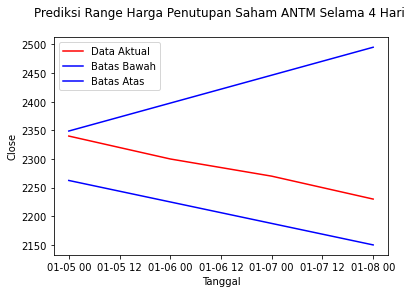

In [ ]:
#Grafik Prediksi dengan Data Aktual
import matplotlib.pyplot as plt
import numpy as np
import math

X = da['Date'][1:5]

x = da['Close'][1:5]
y = BtsB[1:5]
z = BtsA[1:5]

plt.plot(X, x, color='r', label='Data Aktual')
plt.plot(X, y, color='b', label='Batas Bawah')
plt.plot(X, z, color='b', label='Batas Atas')

plt.xlabel("Tanggal")
plt.ylabel("Close")
plt.title("Prediksi Range Harga Penutupan Saham ANTM Selama 4 Hari \n")

plt.legend()

plt.show()